# Anomaly Detection - Credit Card Fraud

### By: Scholar Sun
Given a set of credit card transactions can we detect which transaction is fraudulent?
We are presented with a anomaly detection problem.

## Initial Data Exploration

In [3]:
import importlib  
foobar = importlib.import_module("imblearn")
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'imblearn'

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
# Display the dataframe
def show_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): # Displays code, with meaning cleansup try/catch
        display(df)

In [54]:
# Read and copy data
df_raw = pd.read_csv('data/creditcard.csv')
df = df_raw.copy()
show_all(df.head())
print(df)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


            Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.48

In [4]:
# See overall data types
show_all(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Seems like amount and time arent scaled. We scale them and start splitting up our data frame.

In [55]:
from sklearn import preprocessing
# Scale features
df[['Amount','Time']] = preprocessing.scale(df[['Amount','Time']])

# Get positive y cases and normal cases
positive_cases_y = df.loc[df['Class'] == 1].loc[:,'Class']
normal_cases_y = df.loc[df['Class'] == 0].loc[:,'Class']

# Count positive cases and normal cases
count_positive = list(positive_cases_y).count(1)
count_normal = list(normal_cases_y).count(0)

# Yield a percentage
percentage = count_positive/(count_positive+count_normal)

# Split dataframe into positive and normal cases
df_y_good = df.loc[df['Class'] == 0].loc[:,'Class']
df_x_good = df.loc[df['Class'] == 0].drop('Class', axis=1)

df_y_anomaly = df.loc[df['Class'] == 1].loc[:,'Class']
df_x_anomaly = df.loc[df['Class'] == 1].drop('Class', axis=1)

# Splits data for full data set testing later
df_y, df_x = df['Class'], df.drop('Class', axis=1)

print("Number of positive cases: ", count_positive)
print("Percent of positive cases: ", percentage)
print("Any null entriess?: ", df.isnull().any().any())

Number of positive cases:  492
Percent of positive cases:  0.001727485630620034
Any null entriess?:  False


With most fraud detection problems, we have very few anomalous cases to work with. We also note that there are no null values.
Notice the only unanonomized features are amount and time, we see if there are any interesting properties of these two features.

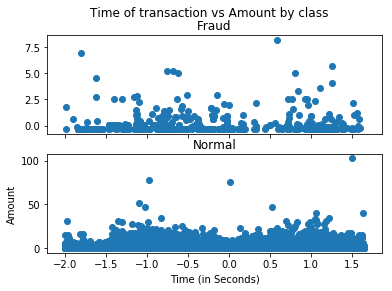

In [6]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(df_x_anomaly.Time, df_x_anomaly.Amount)
ax1.set_title('Fraud')
ax2.scatter(df_x_good.Time, df_x_good.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

So it seems like credit card fraud can happen at any time at any ammount.
Let's investigate the other features by plotting them as histograms...

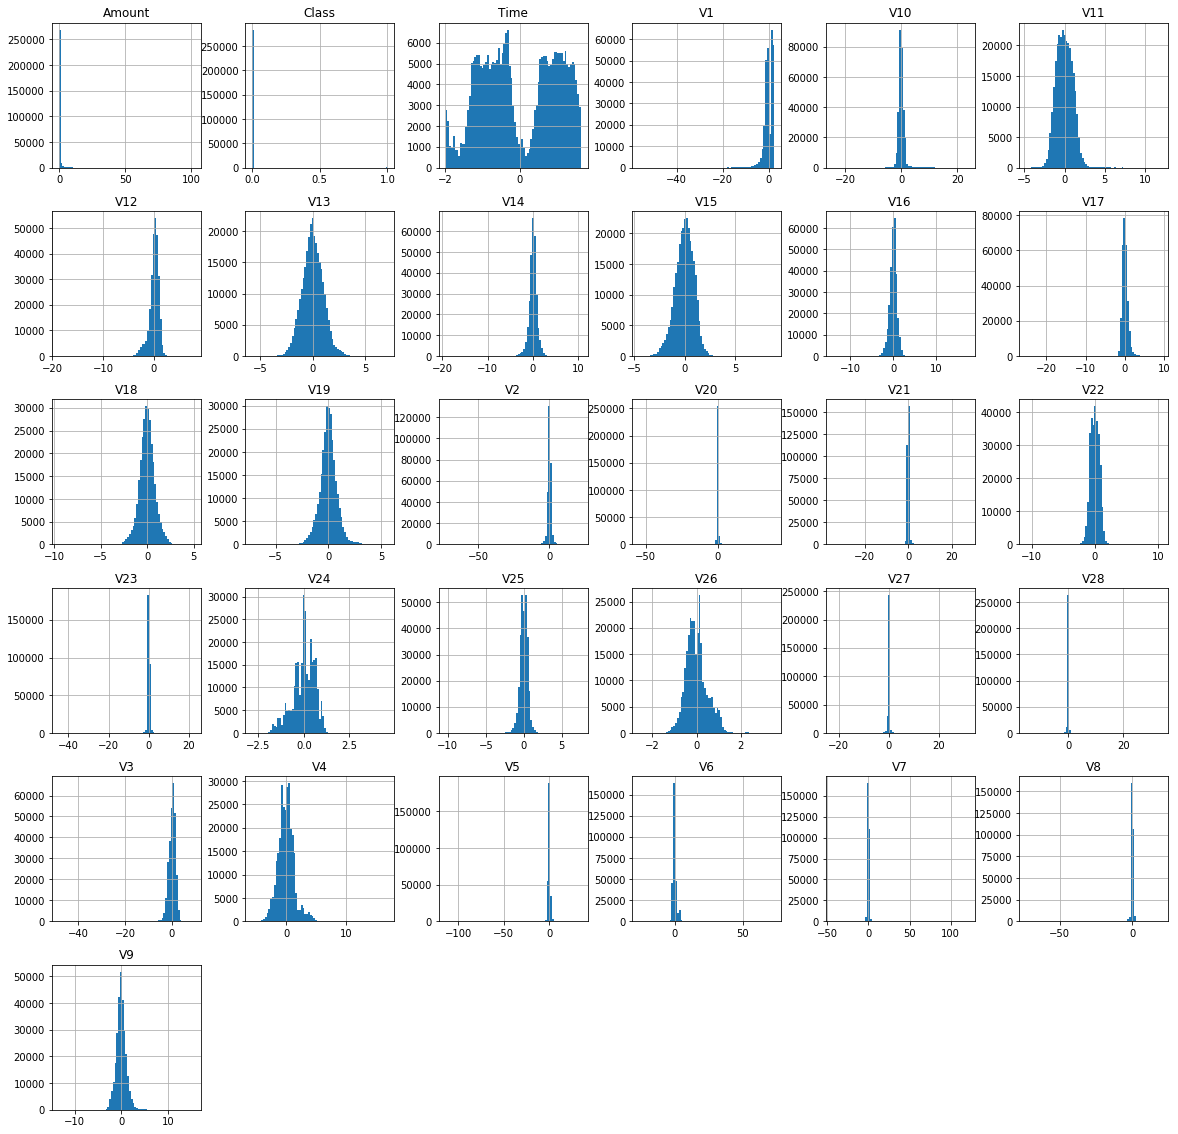

In [7]:
df.hist(figsize=(20,20),bins = 75)
plt.show()

Seems like a few of the features follow a gaussian distribution, some follow some form of distribution and a couple have stacked almost singular values. (We could use Gaussian distribution analysis, but it is "fussy", in that we have to reshape the data and choose an appropriate epsilon).

We then want to get an idea of what the data looks like in a 2D model. We perform a t-SNE transform. A t-SNE transformation is a dimension reduction transformation that is used mainly for data visualization purposes. One important note is that it does not preserve information on density. Instead, it represents a point's nearest neighbours, where points of similar nature are closer together and more different points are further. 

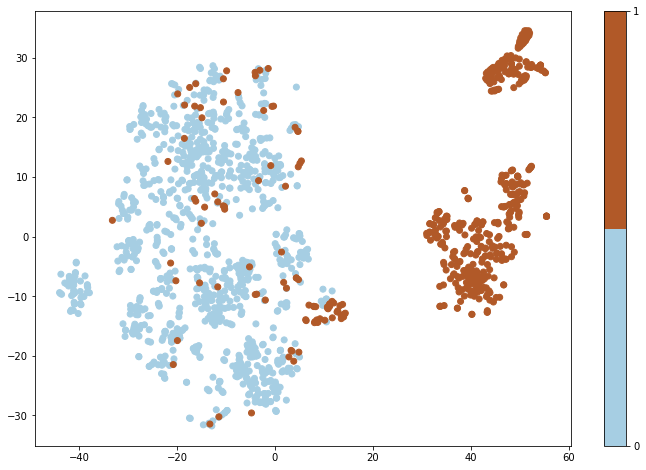

In [8]:
from sklearn.manifold import TSNE

df_plt=df[df['Class']==0].sample(1000)
df_plt_pos=df[df['Class']==1].sample(492)
df_plt=pd.concat([df_plt,df_plt_pos])
y_plt=df_plt['Class']
X_plt=df_plt.drop('Class',1)

X_embedded = TSNE(n_components=2, perplexity = 50).fit_transform(X_plt)

plt.figure(figsize=(12,8))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_plt, cmap=plt.cm.get_cmap("Paired", 2))
plt.colorbar(ticks=range(2))

Seems like t-SNE already did a pretty good job clustering groups of outliers. There are some sprinkling of outliers within the normal cases however, but with some manipulation we can counteract this. This is promising.

In [57]:
# Random undersampling/oversampling
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

print(new_df)


            Time         V1         V2         V3         V4         V5  \
212059  0.924067   2.066527   0.002615  -1.308149   0.359762   0.003001   
72757  -0.841640  -2.986466  -0.000891   0.605887   0.338338   0.685448   
197083  0.779609  -1.063595  -5.350224  -1.328177   2.671383  -2.326583   
44091  -1.116551  -7.222731   6.155773 -10.826460   4.180779  -6.123555   
79525  -0.773960  -2.630598   5.125759  -6.092255   5.527393   1.605145   
203788  0.845436   2.043988  -0.155934  -1.258222   0.183617   0.141574   
263963  1.397975   0.123106   0.970478  -0.492955  -0.576661   1.056006   
280149  1.569597  -0.676143   1.126366  -2.213700   0.468308  -1.120541   
148974 -0.093220  -0.617743   1.228172  -0.001882  -0.463948   0.080589   
144296 -0.185391  -2.555566  -0.660807   1.341329  -2.198762  -0.617224   
150692 -0.019160 -11.320633   7.191950 -13.179083   9.099552 -10.094749   
226754  1.052373  -2.015213  -0.269433  -1.208173  -1.477934   0.868619   
61863  -0.943245  -1.7290

## Model Selection

Key points:

- Skewed data set where we have very few anomolous cases. 
- t-SNE clusters pretty decently
- PCA transformed so we perform no feature engineering. (For now).

We first test isolation forests. 

Since the data is labeled, we can also use some tried and true classification models:
- K-Nearest
- Logistic regression
- Random forest

Isolation forest is a relatively new form of unsupervised outlier detection that boasts great results on large, higher-dimension data sets. Seems promising so I want to try that first. If it turns out poorly, we can test other models. 

### Isolation Forest

For our test and training split, I opted for a stratified shuffle, which preservers the percentages of outliers in both training and test sets.

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)

for train_index, test_index in sss.split(df_x, df_y):
    print("Train:", train_index, "Test:", test_index)
    X_train, X_valid = df_x.iloc[train_index], df_x.iloc[test_index]
    y_train, y_valid = df_y.iloc[train_index], df_y.iloc[test_index]

#print(original_Xtrain)
#print(original_Xtest)


Train: [  9341 210529  51525 ... 224660 206178  99525] Test: [ 32255 171386 198944 ... 138758 212696 203581]
Train: [ 10301  84176    390 ...  13070 138218 148701] Test: [180911  84197 166643 ...  70732 169252 150551]
Train: [ 85107 252882  60427 ... 258430  26954  34834] Test: [195123 215525  81858 ... 248741  73553 173385]
Train: [ 47477 173926 233851 ... 106865 184772 135086] Test: [137109 254383 233197 ... 129490 157294 200980]
Train: [260386  93305 221277 ...  77793  80098  33334] Test: [103563 246055 269160 ... 134382 258788  88740]


In [11]:
from sklearn.ensemble import IsolationForest
isfo = IsolationForest(contamination = percentage, bootstrap = True, n_jobs = -1,n_estimators = 300, max_samples = 2048)
isfo.fit(X_train)

c:\users\scholar\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=True,
        contamination=0.001727485630620034, max_features=1.0,
        max_samples=2048, n_estimators=300, n_jobs=-1, random_state=None,
        verbose=0)

In [12]:
def updateY(y):
    y[y == 1] = 0
    y[y == -1] = 1
    return y

y_test_pred = isfo.predict(X_valid)
y_train_pred = isfo.predict(X_train)

y_test_pred=updateY(y_test_pred)
y_train_pred=updateY(y_train_pred)

c:\users\scholar\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
c:\users\scholar\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

def evaluate(predicted, actual):
    c_m = confusion_matrix(predicted, actual)
    false_positive = c_m[0][1]
    true_positive = c_m[1][1]
    print("Accuracy: ", accuracy_score(predicted, actual))
    print("Confusion Matrix: ", c_m)
    print("F1: ", f1_score(predicted, actual))
    print("False positive rate: ", false_positive/(false_positive+true_positive))
    print()
    
print("TRAIN")
evaluate(y_train_pred, y_train)
print("TEST")
evaluate(y_test_pred, y_valid)


TRAIN
Accuracy:  0.9976124119467181
Confusion Matrix:  [[227179    272]
 [   272    122]]
F1:  0.3096446700507614
False positive rate:  0.6903553299492385

TEST
Accuracy:  0.9977353323268143
Confusion Matrix:  [[56801    66]
 [   63    32]]
F1:  0.33160621761658027
False positive rate:  0.673469387755102



After some hyperparameter tuning, I have arrived at the optimal parameters. Selecting 2024 random samples, with replacement.

Seems okay for a pretty basic model, with minimal feature engineering. However I am not satisifed with a ~32% fraud detection rate. I investigate further why my model is underperforming and consider using other models.

I try removing unimportant features, which can yield inaccuracies when scoring outliers due to relatively similar path lengths.

In [14]:
def rmse(x,y): 
    return np.sqrt(np.mean(((x-y)**2)))

def print_score(m):
    scores = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    
    for t, s in zip(['Train RMSE: ', 'Valid RMSE', 'Train R^2', 'Valid R^2'], scores):
        print(f'{t}: {s}')
        
    if hasattr(m, 'oob_score_'): 
        print(f'OOB Score: {m.oob_score_}')

In [15]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=30, 
                              n_jobs=-1,
                              oob_score=True)

model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [16]:
print_score(model)

Train RMSE: : 0.008163562127013716
Valid RMSE: 0.020054387309287616
Train R^2: 0.961394041712778
Valid R^2: 0.7658329560955879
OOB Score: 0.7179394615947216


In [17]:
def updateYForest(y):
    y[y > 0.5] = 1
    y[y <= 0.5] = 0
    return y

pred = updateYForest(model.predict(X_valid))
evaluate(pred, y_valid)

Accuracy:  0.9996137776061234
Confusion Matrix:  [[56860    18]
 [    4    80]]
F1:  0.8791208791208791
False positive rate:  0.1836734693877551



Out of curiosity, I train and score a Random forest and it performs miles better than the anomaly detection algorithm. We try some supervised learning algorithms later in the notebook, after we try to optimize our isolation forest.

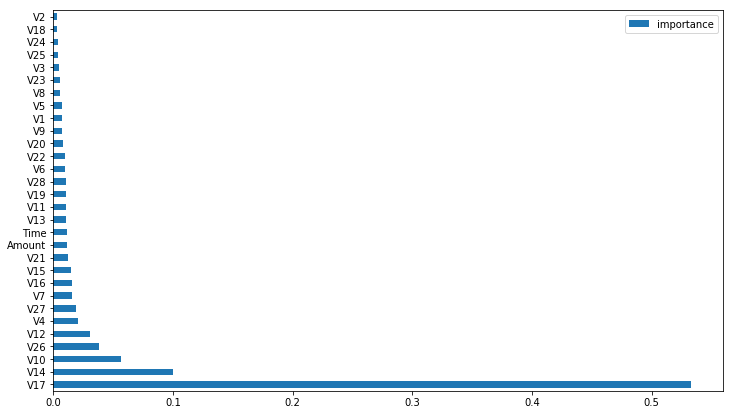

In [18]:
fi = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
fi[:30].plot.barh(figsize=(12, 7))

In [19]:
X_train_old, X_valid_old = X_train.copy(), X_valid.copy()
X_train, X_valid = X_train[fi[fi['importance'] > 0.03].index], X_valid[fi[fi['importance'] > 0.03].index]
print(X_train.shape)

(227845, 5)


In [20]:
isfo.fit(X_train)
new_fi_pred = isfo.predict(X_valid)
new_fi_pred = updateY(new_fi_pred)
new_fi_pred2 = isfo.predict(X_train)
new_fi_pred2 = updateY(new_fi_pred2)
evaluate(new_fi_pred,y_valid)
evaluate(new_fi_pred2,y_train)

c:\users\scholar\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:224: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
c:\users\scholar\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
c:\users\scholar\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:418: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


Accuracy:  0.9987886661282961
Confusion Matrix:  [[56829    34]
 [   35    64]]
F1:  0.649746192893401
False positive rate:  0.3469387755102041

Accuracy:  0.9987447606925761
Confusion Matrix:  [[227308    143]
 [   143    251]]
F1:  0.6370558375634517
False positive rate:  0.3629441624365482



0.65 F1 score and 33% false positive rate was quite the improvement. I'm not sure what other techniques I can use to enhance the difference between outlier and normal case path lengths. I'm pretty happy with the result, as it was a quick and dirty way to classify the outliers with very minimal data manipulation.
However, we can use the fact that the data is labelled to our advantage.

### Supervised Learning Models

Classification models are fundamentally different from anomaly detection models as they classify new points based on a previously learned profile of positive/normal cases. Thus class imbalance is a huge problem when it comes to these models. We attempt to reduce this by over/undersampling the data to balance the classes. 
There are a few things to do before we go train the models.

To improve our model's accuracy we should:
- remove extreme outliers that will influence our boundaries. (IQR method)
- try undersampling/oversampling to reduce overfitting of normal cases and reinforce learning of fraudulent cases. 
- try removing features of lesser importance (already done, we just need to do some testing)
- consolidate similarly correlated features

To decide on a model, we can use a learning curve to see which model is less prone to overfitting.

## Data Processing

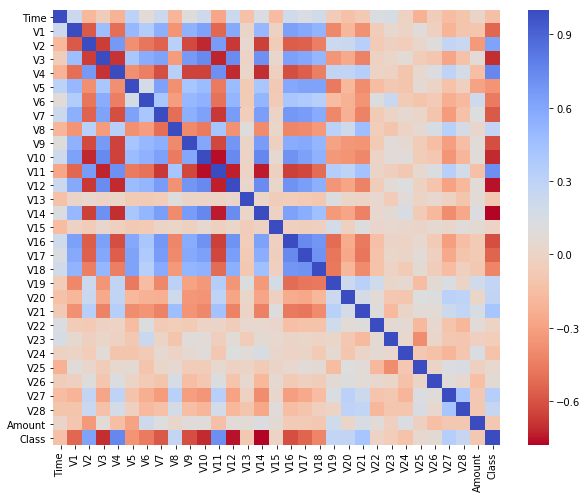

In [56]:
from scipy import stats

corr = np.round(stats.spearmanr(new_df).correlation, 4)
fig, ax = plt.subplots(figsize=(10,8))
g = sns.heatmap(corr, ax=ax,cmap='coolwarm_r')
g.set_yticklabels(new_df.columns, rotation=0)
g.set_xticklabels(new_df.columns, rotation=90)
None

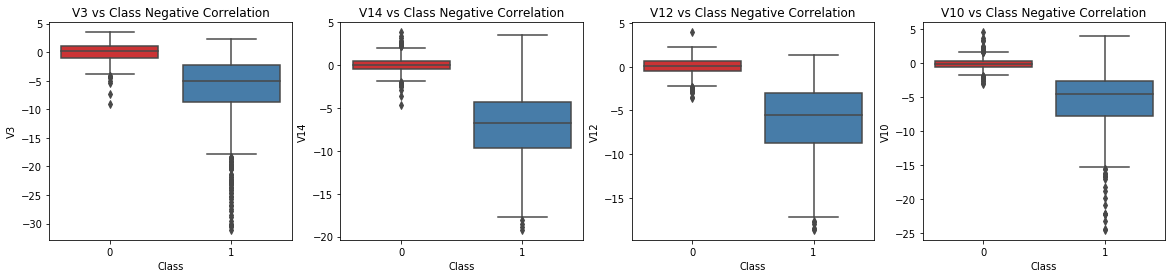

In [27]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V3", data=new_df, palette= "Set1", ax=axes[0])
axes[0].set_title('V3 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette="Set1", ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, palette="Set1", ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, palette="Set1", ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()


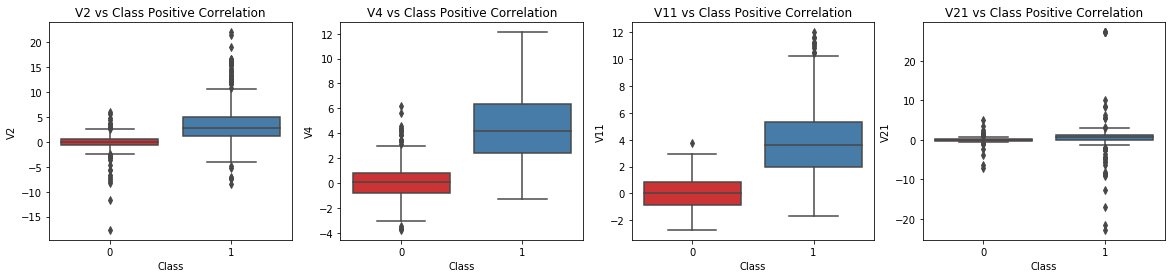

In [28]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V2", data=new_df, palette= "Set1", ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette="Set1", ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=new_df, palette="Set1", ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V21", data=new_df, palette="Set1", ax=axes[3])
axes[3].set_title('V21 vs Class Positive Correlation')

plt.show()

In [29]:
def remove_outliers(df,col_name):
    v_fraud = df[col_name].loc[df['Class'] == 1].values
    q25, q75 = np.percentile(v_fraud, 25), np.percentile(v_fraud, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    v_iqr = q75 - q25
    print('iqr: {}'.format(v_iqr))

    v_cut_off = v_iqr * 1.5
    v_lower, v_upper = q25 - v_cut_off, q75 + v_cut_off
    print('Cut Off: {}'.format(v_cut_off))
    print('{} Lower: {}'.format(col_name,v_lower))
    print('{} Upper: {}'.format(col_name, v_upper))

    outliers = [x for x in v_fraud if x < v_lower or x > v_upper]
    print('Feature {} Outliers for Fraud Cases: {}'.format(col_name,len(outliers)))
    print('Outliers:{}'.format(outliers))

    df = df.drop(df[(df[col_name] > v_upper) | (df[col_name] < v_lower)].index)
    print('----' * 44)
    return df


In [61]:
#Full_train = pd.concat([X_train, y_train], axis=1)
print(new_df.shape)
colnames = ['V14','V12','V10','V3','V4','V11','V21','V2']
#print(Full_train.shape)
for col in colnames:
    new_df = remove_outliers(new_df, col)
#print(Full_train.shape)
print(new_df.shape)

newdfy = new_df['Class']
newdfx = new_df.drop('Class', axis=1)

#y_train = Full_train["Class"]
#X_train = Full_train.drop("Class", axis = 1)

(984, 31)
Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
iqr: 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
Outliers:[-18.049997689859396, -18.8220867423816, -19.2143254902614, -18.4937733551053]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
iqr: 5.780002635714835
Cut Off: 8.670003953572252
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
Feature V12 Outliers for Fraud Cases: 4
Outliers:[-18.553697009645802, -18.4311310279993, -18.683714633344298, -18.047596570821604]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Quartile 25: -7.4666585358

In [62]:
# Three way test split
# With all features:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
#print(df_x)
#print(df_y)
for train_index, test_index in sss.split(newdfx, newdfy):
    X_train, X_split = newdfx.iloc[train_index], newdfx.iloc[test_index]
    y_train, y_split = newdfy.iloc[train_index], newdfy.iloc[test_index]
    
#sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=1)
#print(X_split)
#print(y_split)
#X_split.reset_index(inplace = True, drop=True)
#y_split.reset_index(inplace = True, drop=True)
#for train_index2, test_index2 in sss.split(X_split, y_split):
#    X_cv, X_valid = X_split.iloc[train_index2], X_split.iloc[test_index2]
#    y_cv, y_valid = y_split.iloc[train_index2], y_split.iloc[test_index2]
    
# With top 5 important features:


In [42]:
# Perform Undersampling
normal_indices = Full_train[Full_train.Class == 0].index
sample_size = sum(Full_train.Class == 1)  # Equivalent to len(data[data.Healthy == 0])
random_indices = np.random.choice(normal_indices, sample_size, replace=False)
Full_train_us = Full_train.loc[random_indices]
print(Full_train_us.shape)
ycon = Full_train[Full_train.Class == 1]
print(ycon.shape)
Full_train_us = pd.concat([Full_train_us,ycon])
print(Full_train_us.shape)
y_train = Full_train["Class"]
X_train = Full_train.drop("Class", axis = 1)

(207, 31)
(207, 31)
(414, 31)


In [63]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
print_score(lr)
lr_pred = lr.predict(X_valid)
evaluate(lr_pred,y_valid)

Train RMSE: : 0.227834143504798
Valid RMSE: 0.18653451845600003
Train R^2: 0.9480916030534351
Valid R^2: 0.9652048734243882
Accuracy:  0.9652048734243882
Confusion Matrix:  [[54894    13]
 [ 1969    86]]
F1:  0.07985143918291551
False positive rate:  0.13131313131313133

